In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
from konlpy.tag import Hannanum
import pandas as pd

def naver_news(keyword, starting_date, ending_date):

    a = ''

    for x in range(20):
        url = r'https://search.naver.com/search.naver?&where=news&query={}&sm=tab_pge&sort=1&photo=0&field=0&reporter_article=&pd=3&ds={}&de={}&docid=&nso=so:r,p:from20201126to20201126,a:all&mynews=0&cluster_rank=18&start={}&refresh_start=0'.format(keyword, starting_date, ending_date, 10*(x)+1)  
        resp = requests.get(url)
        soup = BeautifulSoup(resp.text, 'lxml')
        article_title = soup.find_all('a', class_ = 'news_tit')
        print('imported words in page {}!'.format(x))
        for i in article_title:
            a += i.get_text()
    print("Imported words from {} to {}!".format(starting_date, ending_date))
    return a



def function(date):
    date_str = str(date.date())
    date_str = date_str.replace('-', '.')
    empty_df = pd.DataFrame()

    most_word_list = ['아이폰']

    for x in range((date-datetime(date.year, date.month , 1)).days):
        result_ = naver_news('애플', date_str, date_str)

        hannanum = Hannanum()
        result_list = hannanum.nouns(result_)
        word_list = pd.Series(result_list)
        result_ = word_list.value_counts().head(500)

        date_str = date_str.replace('.', '-')
        a = pd.DataFrame(result_)
        a = a.transpose()
        a['Date'] = date_str
        a = a.set_index('Date')

        count = 0

        for y in range(len(a.columns)):
            for x in range(len(most_word_list)):
                if(a.columns[y] == most_word_list[x]):
                    count += 1

        if(count == len(most_word_list)):
            a = a[most_word_list]
            print(a)
            a.columns[0]
            empty_df = pd.concat([empty_df, a])

        date_str = date_str.replace('-', '.')
        date_int = int(date_str.replace('.', '')) - 1
        date_str = str(date_int)
        date_str = date_str[:4]+'.'+date_str[4:6]+'.'+date_str[6:8]

    # words in first day
    count = 0
    result_ = naver_news('애플', date_str, date_str)

    hannanum = Hannanum()
    result_list = hannanum.nouns(result_)
    word_list = pd.Series(result_list)
    result_ = word_list.value_counts().head(500)

    date_str = date_str.replace('.', '-')
    a = pd.DataFrame(result_)
    a = a.transpose()
    a['Date'] = date_str
    a = a.set_index('Date')

    for y in range(len(a.columns)):
        for x in range(len(most_word_list)):
            if(a.columns[y] == most_word_list[x]):
                count += 1

    if(count == len(most_word_list)):
        a = a[most_word_list]

        empty_df = pd.concat([empty_df, a])



    return empty_df

empty_df2 = pd.DataFrame()

end = datetime(2019, 12, 31)
start = datetime(2017, 1, 1)

date = end


for x in range((end.year - start.year)*12 + end.month-start.month+1):
    empty_df2 =  pd.concat([empty_df2, function(date)])
    if(date.month == 11 or date.month == 9 or date.month == 8 or date.month == 6 or date.month == 4 or date.month == 2):
        date = datetime(date.year, date.month-1, 30)
    elif(date.month == 12 or date.month == 10 or date.month == 7 or date.month == 5):
        date = datetime(date.year, date.month-1, 29)
    elif(date.month == 3):
        date = datetime(date.year, date.month-1, 28)
    elif(date.month == 1):
        date = datetime(date.year-1, 12, 30)
    
empty_df2

imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.12.31 to 2019.12.31!
            아이폰
Date           
2019-12-31    1
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported

imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.12.18 to 2019.12.18!
            아이폰
Date           
2019-12-18    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.12.17 to 2019.12.17!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported wo

            아이폰
Date           
2019-12-05    5
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.12.04 to 2019.12.04!
            아이폰
Date           
2019-12-04    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words

imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.11.20 to 2019.11.20!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.11.19 to 2019.11.19!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported 

imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.11.06 to 2019.11.06!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.11.05 to 2019.11.05!
            아이폰
Date           
2019-11-05    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported 

            아이폰
Date           
2019-10-23    5
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.10.22 to 2019.10.22!
            아이폰
Date           
2019-10-22    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words

imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.10.09 to 2019.10.09!
            아이폰
Date           
2019-10-09    5
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
import

imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.09.25 to 2019.09.25!
            아이폰
Date           
2019-09-25    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.09.24 to 2019.09.24!
            아이폰
Date           
2019-09-24    1
imported words in page 0!
imported word

imported words in page 18!
imported words in page 19!
Imported words from 2019.09.12 to 2019.09.12!
            아이폰
Date           
2019-09-12    6
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.09.11 to 2019.09.11!
            아이폰
Date           
2019-09-11   15
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in pa

imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.08.28 to 2019.08.28!
            아이폰
Date           
2019-08-28    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.08.

imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.08.15 to 2019.08.15!
            아이폰
Date           
2019-08-15    1
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.08.14 to 2019.08.14!
            아이폰
Date           
2019-08-14    8
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words i

imported words in page 19!
Imported words from 2019.08.02 to 2019.08.02!
            아이폰
Date           
2019-08-02    6
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.08.01 to 2019.08.01!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words i

imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.07.18 to 2019.07.18!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19

imported words in page 18!
imported words in page 19!
Imported words from 2019.07.05 to 2019.07.05!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.07.04 to 2019.07.04!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported w

imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.06.20 to 2019.06.20!
            아이폰
Date           
2019-06-20    6
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.06.19 to 2019.06.19!
imported words in page 0!
imported

            아이폰
Date           
2019-06-07    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.06.06 to 2019.06.06!
            아이폰
Date           
2019-06-06    1
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words

imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.05.23 to 2019.05.23!
            아이폰
Date           
2019-05-23    7
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.05.22 to 2019.05.22!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported word

imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.05.09 to 2019.05.09!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19

imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.04.25 to 2019.04.25!
            아이폰
Date           
2019-04-25    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.04.24 to 2019.04.24!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported word

imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.04.11 to 2019.04.11!
            아이폰
Date           
2019-04-11    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Im

imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.03.28 to 2019.03.28!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.03.27 to 2019.03.27!
            아이폰
Date           
2019-03-27   13
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words 

imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.03.14 to 2019.03.14!
            아이폰
Date           
2019-03-14    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
impo

imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.03.01 to 2019.03.01!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.02.28 to 2019.02.28!
            아이폰
Date           
2019-02-28    4
imported

imported words in page 19!
Imported words from 2019.02.16 to 2019.02.16!
            아이폰
Date           
2019-02-16    1
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.02.15 to 2019.02.15!
            아이폰
Date           
2019-02-15    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in pag

imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.02.02 to 2019.02.02!
            아이폰
Date           
2019-02-02    1
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
importe

imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.01.19 to 2019.01.19!
            아이폰
Date           
2019-01-19    1
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.01.18 to 2019.01.18!
            아이폰
Date           
2019-01-18    3
imported wor

imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.01.06 to 2019.01.06!
            아이폰
Date           
2019-01-06    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2019.01.05 to 2019.01.05!
            아이폰
Date           
2019-01-05    6
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in

            아이폰
Date           
2018-12-23    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.12.22 to 2018.12.22!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported

imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.12.09 to 2018.12.09!
            아이폰
Date           
2018-12-09    6
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.12.

imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.11.25 to 2018.11.25!
            아이폰
Date           
2018-11-25    4
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.11.24 to 2018.11.24!
            아이폰
Date           
2018-11-24    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words i

imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.11.12 to 2018.11.12!
            아이폰
Date           
2018-11-12    4
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.11.11 to 2018.11.11!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words 

imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.10.28 to 2018.10.28!
            아이폰
Date           
2018-10-28    1
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
import

imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.10.15 to 2018.10.15!
            아이폰
Date           
2018-10-15    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.10.

imported words in page 18!
imported words in page 19!
Imported words from 2018.10.02 to 2018.10.02!
            아이폰
Date           
2018-10-02    5
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.10.01 to 2018.10.01!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words i

imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.09.17 to 2018.09.17!
            아이폰
Date           
2018-09-17    8
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
import

imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.09.04 to 2018.09.04!
            아이폰
Date           
2018-09-04    6
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Im

imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.08.21 to 2018.08.21!
            아이폰
Date           
2018-08-21    1
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.08.20 to 2018.08.20!
            아이폰
Date           
2018-08-20    3
imported words in page 0!
imported word

imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.08.08 to 2018.08.08!
            아이폰
Date           
2018-08-08    5
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.08.07 to 2018.08.07!
            아이폰
Date           
2018-08-07    7
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in 

imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.07.24 to 2018.07.24!
            아이폰
Date           
2018-07-24    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
importe

imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.07.11 to 2018.07.11!
            아이폰
Date           
2018-07-11    4
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Im

imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.06.27 to 2018.06.27!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.06.26 to 2018.06.26!
            아이폰
Date           
2018-06-26    4
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported word

            아이폰
Date           
2018-06-14   10
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.06.13 to 2018.06.13!
            아이폰
Date           
2018-06-13    5
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words

imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.05.30 to 2018.05.30!
            아이폰
Date           
2018-05-30    9
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
impo

imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.05.17 to 2018.05.17!
            아이폰
Date           
2018-05-17    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.05.16 to 2018.05.16!
            아이폰
Date           
2018-05-16    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words 

imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.05.03 to 2018.05.03!
            아이폰
Date           
2018-05-03    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
import

imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.04.19 to 2018.04.19!
            아이폰
Date           
2018-04-19    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.04.18 to 2018.04.18!
            아이폰
Date           
2018-04-18    4
imported words in page 0!
imported word

imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.04.06 to 2018.04.06!
            아이폰
Date           
2018-04-06    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.04.05 to 2018.04.05!
            아이폰
Date           
2018-04-05   11
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in 

imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.03.22 to 2018.03.22!
            아이폰
Date           
2018-03-22    8
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
importe

imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.03.09 to 2018.03.09!
            아이폰
Date           
2018-03-09    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.03.08 to 2018.03.08!
            아이폰
Date           
2018-03-08    4
imported wor

imported words in page 19!
Imported words from 2018.02.24 to 2018.02.24!
            아이폰
Date           
2018-02-24    1
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.02.23 to 2018.02.23!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words i

imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.02.10 to 2018.02.10!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19

imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.01.27 to 2018.01.27!
            아이폰
Date           
2018-01-27    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.01.26 to 2018.01.26!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported word

imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2018.01.13 to 2018.01.13!
            아이폰
Date           
2018-01-13    1
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported

imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.12.30 to 2017.12.30!
            아이폰
Date           
2017-12-30   19
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imp

imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.12.17 to 2017.12.17!
            아이폰
Date           
2017-12-17    1
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.12.16 to 2017.12.16!
            아이폰
Date           
20

imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.12.04 to 2017.12.04!
            아이폰
Date           
2017-12-04    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.12.03 to 2017.12.03!
            아이폰
Date           
2017-12-03    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words i

imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.11.19 to 2017.11.19!
            아이폰
Date           
2017-11-19    1
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported

imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.11.06 to 2017.11.06!
            아이폰
Date           
2017-11-06    9
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
impo

imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.10.23 to 2017.10.23!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.10.22 to 2017.10.22!
            아이폰
Date           
2017-10-22    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words 

imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.10.09 to 2017.10.09!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19

imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.09.25 to 2017.09.25!
            아이폰
Date           
2017-09-25    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.09.24 to 2017.09.24!
            아이폰
Date           
2017-09-24    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words 

imported words in page 18!
imported words in page 19!
Imported words from 2017.09.12 to 2017.09.12!
            아이폰
Date           
2017-09-12   11
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.09.11 to 2017.09.11!
            아이폰
Date           
2017-09-11    6
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in pa

imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.08.28 to 2017.08.28!
            아이폰
Date           
2017-08-28    4
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported

imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.08.15 to 2017.08.15!
            아이폰
Date           
2017-08-15    4
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.08.14 to 2017.08.14!
            아이폰
Date           
2017-08-14    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in 

imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.08.01 to 2017.08.01!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017

imported words in page 18!
imported words in page 19!
Imported words from 2017.07.18 to 2017.07.18!
            아이폰
Date           
2017-07-18    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.07.17 to 2017.07.17!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words i

imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.07.04 to 2017.07.04!
            아이폰
Date           
2017-07-04    5
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.07.

imported words in page 19!
Imported words from 2017.06.20 to 2017.06.20!
            아이폰
Date           
2017-06-20    5
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.06.19 to 2017.06.19!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words i

imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.06.06 to 2017.06.06!
            아이폰
Date           
2017-06-06    5
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.06.05 to 2017.06.05!
            아이폰
Date           
2017-06-05    3
imported wor

imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.05.22 to 2017.05.22!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
im

imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.05.09 to 2017.05.09!
            아이폰
Date           
2017-05-09    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.05.08 to 2017.05.08!
            아이폰
Date           
20

            아이폰
Date           
2017-04-25    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.04.24 to 2017.04.24!
            아이폰
Date           
2017-04-24    5
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words

imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.04.11 to 2017.04.11!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017

imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.03.28 to 2017.03.28!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.03.27 to 2017.03.27!
            아이폰
Date           
2017-03-27    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words

imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.03.14 to 2017.03.14!
            아이폰
Date           
2017-03-14    1
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported

imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.03.01 to 2017.03.01!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.02.28 to 2017.02.28!
            아이폰
Date           
2017-02-28    5
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported 

imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.02.15 to 2017.02.15!
            아이폰
Date           
2017-02-15    4
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
import

imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.02.02 to 2017.02.02!
            아이폰
Date           
2017-02-02    2
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.02.01 to 2017.02.01!
imported words in page 0!
imported

imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.01.18 to 2017.01.18!
            아이폰
Date           
2017-01-18    1
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
import

imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.01.05 to 2017.01.05!
            아이폰
Date           
2017-01-05    3
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported words in page 3!
imported words in page 4!
imported words in page 5!
imported words in page 6!
imported words in page 7!
imported words in page 8!
imported words in page 9!
imported words in page 10!
imported words in page 11!
imported words in page 12!
imported words in page 13!
imported words in page 14!
imported words in page 15!
imported words in page 16!
imported words in page 17!
imported words in page 18!
imported words in page 19!
Imported words from 2017.01.04 to 2017.01.04!
imported words in page 0!
imported words in page 1!
imported words in page 2!
imported 

,아이폰
Date,
2019-12-31,1
2019-12-29,1
2019-12-27,2
2019-12-23,3
2019-12-22,2
...,...
2017-01-07,1
2017-01-05,3
2017-01-03,3


In [2]:
empty_df2

,아이폰
Date,
2019-12-31,1
2019-12-29,1
2019-12-27,2
2019-12-23,3
2019-12-22,2
...,...
2017-01-07,1
2017-01-05,3
2017-01-03,3


In [3]:
AAPL = pd.read_excel(r'C:\Users\jylee\Desktop\쥬피터노트북저장\AAPL.xlsx')
AAPL.rename(columns = {'Unnamed: 0':'날짜','AAPL':'Price'}, inplace = True)
#df.rename(columns = {'old_nm' : 'new_nm'), inplace = True)
#Unnamed:0
date_list=[]
dict_ = {}
for x in range(len(AAPL['날짜'])):
    b = (len(AAPL['날짜'])-1) - x
    a = AAPL['날짜'][b]
    a = str(a)[:10]
    date_list.append(a)
    
#dict_ = {'Date':date_list}
#date_list = pd.DataFrame(dict_)
    
difference = []
for i in range(len(AAPL)-1):
    difference.append(round(AAPL['Price'][i+1]-AAPL['Price'][i],2))

#difference = pd.DataFrame(difference)
#difference = difference.loc[::-1]
#a = pd.concat([date_list, difference], axis =1)
#a = a.loc[::-1].head(3)
#a = a.set_index('Date')
#a

dict_ = {'Date':date_list[:-1], 'Price':difference}
dict_ = pd.DataFrame(dict_)
dict_ = dict_.set_index('Date')
dict_ = dict_[231:]
dict_

,Price
Date,
2019-12-31,-0.16
2019-12-30,0.08
2019-12-27,0.01
2019-12-26,0.83
2019-12-24,-0.25
...,...
2017-01-12,-3.49
2017-01-11,1.32
2017-01-10,0.86


In [4]:
#dict_ = dict_.head(3)
dict_.index

#empty_df = empty_df.reset_index()
empty_df2.index

Index(['2019-12-31', '2019-12-29', '2019-12-27', '2019-12-23', '2019-12-22',
       '2019-12-21', '2019-12-20', '2019-12-19', '2019-12-18', '2019-12-16',
       ...
       '2017-01-13', '2017-01-12', '2017-01-10', '2017-01-09', '2017-01-08',
       '2017-01-07', '2017-01-05', '2017-01-03', '2017-01-02', '2017-01-01'],
      dtype='object', name='Date', length=836)

In [9]:
result_= pd.merge(empty_df2, dict_, how = 'right', on='Date')
result_ = result_.dropna(axis=0)


In [10]:
result_

,아이폰,Price
Date,,
2019-12-31,1.0,-0.16
2019-12-27,2.0,0.01
2019-12-23,3.0,0.15
2019-12-20,1.0,-0.01
2019-12-19,3.0,0.43
...,...,...
2017-01-18,1.0,-1.36
2017-01-13,5.0,-1.30
2017-01-12,3.0,-3.49


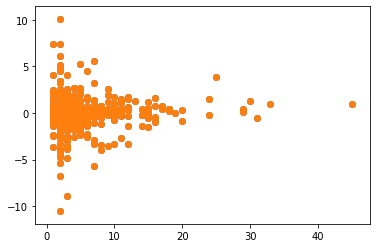

In [11]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt


plt.scatter(result_['아이폰'], result_['Price'])
plt.scatter(result_['아이폰'], result_['Price'])

In [16]:
line_fitter.coef_

array([0.01096655])

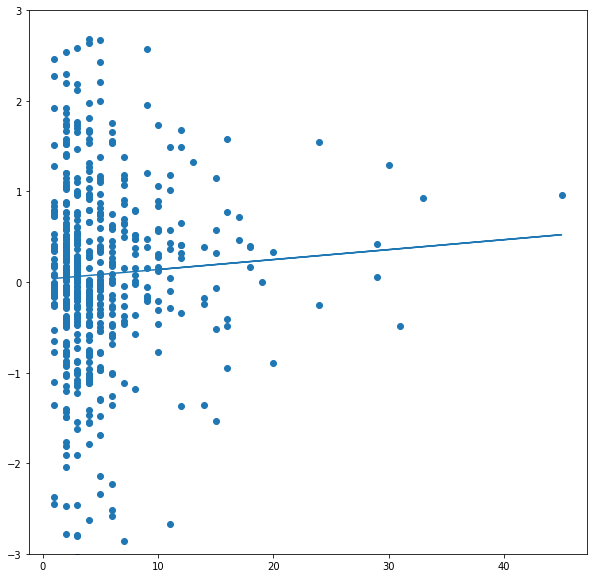

In [15]:
c = result_['아이폰'].values.reshape(-1,1)
line_fitter = LinearRegression()
line_fitter.fit(c, result_['Price'])

plt.figure(figsize = (10, 10))
plt.ylim(-3, 3)
plt.scatter(result_['아이폰'], result_['Price'])
plt.plot(result_['아이폰'], line_fitter.predict(c))

In [25]:
from sklearn.model_selection import train_test_split
g = result_['Price']
c_train, c_test, g_train, g_test = train_test_split(c, g, train_size = 0.8, test_size = 0.2)

mlr = LinearRegression()
mlr.fit(c_train, g_train)

mlr.score(c_test, g_test)

-0.009502956627549297